# Data Mining (Δ02): Exercise Set 2: 2.2 - gauss_ring Dataset 

<br>Name: Nefeli Eleftheria Sextou</br> 
<br> Student ID: 503</br> 
<br> E-mail: pcs00503@uoi.gr, nsekstou@cs.uoi.gr</br>

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing


#classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\gauss_ring.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])
#rings3

### Plot data

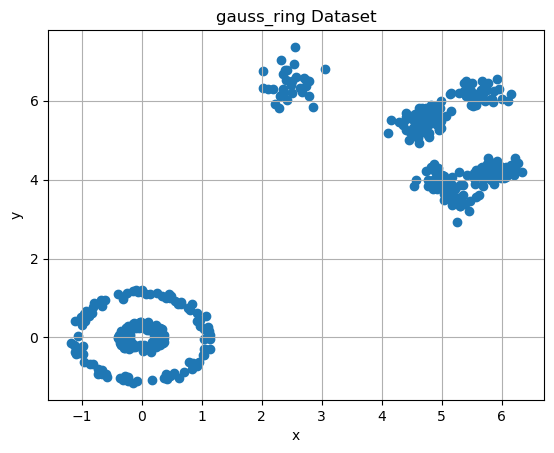

In [3]:
plt.scatter(main_df['x'], main_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('gauss_ring Dataset')
plt.grid(True)
plt.show()

<b>Expected number of clusters: 7</b>

## k-means

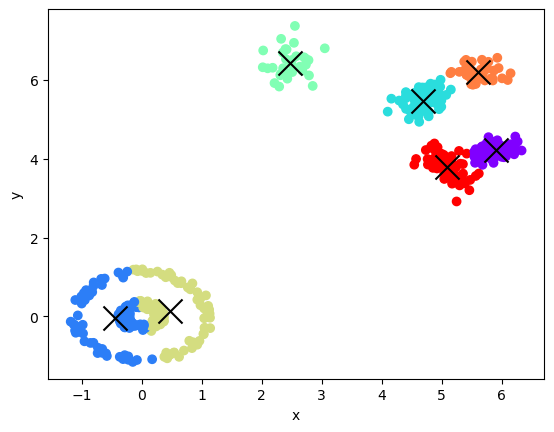

In [46]:
#init and fit
kmeans = KMeans(n_clusters=7)
kmeans.fit(main_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Agglomerative Clustering : single link

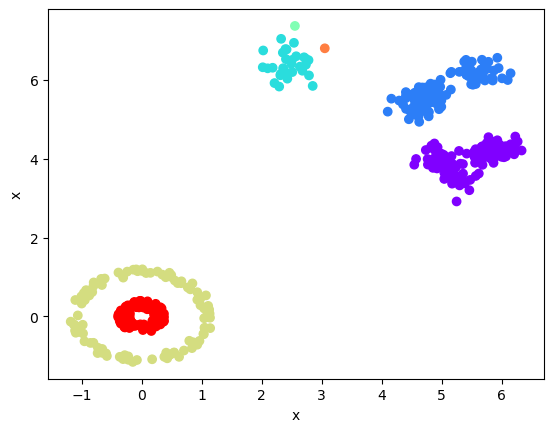

In [45]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=7, linkage='single')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()


## Agglomerative Clustering : average link

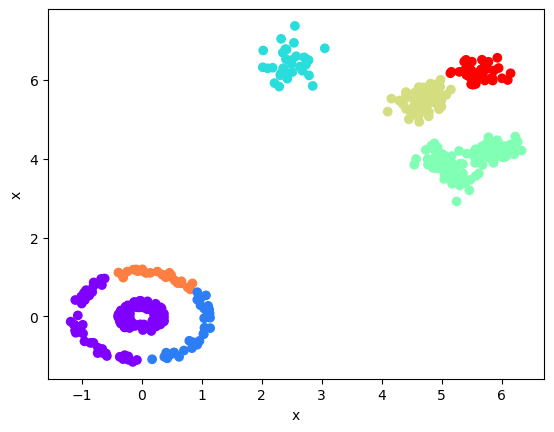

In [44]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=7, linkage='average')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()

## Spectral Clustering 

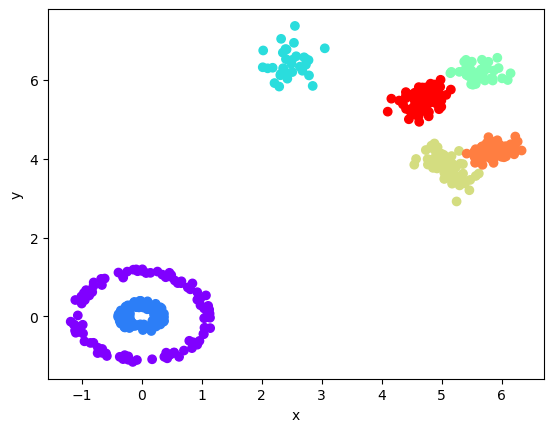

In [72]:
# perform spectral clustering
sigma = 0.4 # tried 0.1 to 1
spectral_cluster = SpectralClustering(n_clusters=7, affinity='rbf', gamma = (1/(sigma**2)), assign_labels='kmeans')
labels = spectral_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Remarks 

The only method that achieves the expected clustering result is Spectral Clusering for <b>sigma=0.4</b>.

The data has two categories of clusters. One category is made up of the two cocentric rings and the other is made up of gaussians of more or less similar density, shape and size. If we isolate the latter (remove the rings), we can find that the number of clusters is 5 by using the Silhouette method for K-Means (gauss_ring_rmv_ring.ipynb). In total with the rings the clusters are 7. The dataset structure is quite complex. This makes classification quite difficult for most of the applied classifiers. Only Spectral Clustering is able to model the dataset's structure effectively. Spectral Clustering is a good choice for handling non-convex clusters and varying densities due to its ability to use eigenvalues of the similarity matrix to reduce dimensions and as a consequence also simplify the structure into a form that is easier to manage.